# Unit Commitment

In [1]:
import numpy as np
import ams

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
ams.__version__

'0.6.7.post85.dev0+g6a7def6'

In [4]:
ams.config_logger(stream_level=10)

In [5]:
sp = ams.load(ams.get_case('ieee39/ieee39_uced.xlsx'), setup=True)

Input format guessed as xlsx.
Parsing input file "/Users/jinningwang/Documents/work/ams/ams/cases/ieee39/ieee39_uced.xlsx"...
Input file parsed in 0.1576 seconds.
Adjust bus index to start from 0.
System set up in 0.0042 seconds.


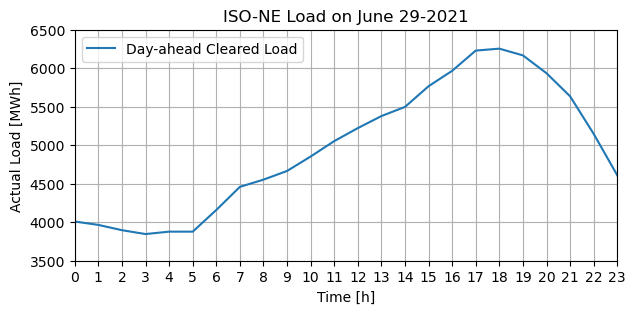

In [6]:
plt.style.use('default')

fig, ax = plt.subplots(1, 1, figsize=(7,3), dpi=100)

ax.plot(np.arange(0, 24), sp.config.mva * sp.PQ.p0.v.sum() * sp.UC.sd.v)

ax.set(xlabel='Time [h]', ylabel='Actual Load [MWh]',
       title='ISO-NE Load on June 29-2021')
ax.set_xticks(np.arange(0, 24, 1))
ax.set_xlim([0, 23])
ax.set_ylim([3500, 6500])
ax.grid()

ax.lines.remove(ax.lines[1])
# ax.lines.remove(ax.lines[-1])

ax.legend(['Day-ahead Cleared Load', 'Real-time Load'])

In [7]:
res_dcopf = sp.DCOPF.run(solver='GUROBI', reoptimize=True)

res_rted = sp.RTED.run(solver='GUROBI', reoptimize=True)

res_ed = sp.ED.run(solver='GUROBI', reoptimize=True)

print(f"<DCOPF> {res_dcopf}; <RTED> {res_rted}; <ED> {res_ed}")

DCOPF data check passed.
- Generating symbols for DCOPF
Set constrs pb: sum(pd) - sum(pg) == 0
Set constrs pinj: Cg@(pn - pd) - pg == 0
Set constrs lub: PTDF @ (pn - pd) - rate_a <= 0
Set constrs llb: - PTDF @ (pn - pd) - rate_a <= 0
Routine <DCOPF> initialized in 0.0061 seconds.


Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-21


DCOPF solved as optimal in 0.0160 seconds with exit code 0.
RTED data check passed.
- Generating symbols for RTED
Set constrs pb: sum(pd) - sum(pg) == 0
Set constrs pinj: Cg@(pn - pd) - pg == 0
Set constrs lub: PTDF @ (pn - pd) - rate_a <= 0
Set constrs llb: - PTDF @ (pn - pd) - rate_a <= 0
Set constrs rbu: gs @ multiply(ug, pru) - dud == 0
Set constrs rbd: gs @ multiply(ug, prd) - ddd == 0
Set constrs rru: multiply(ug, pg + pru) - pmax <= 0
Set constrs rrd: multiply(ug, -pg + prd) - pmin <= 0
Set constrs rgu: multiply(ug, pg-pg0-R10) <= 0
Set constrs rgd: multiply(ug, -pg+pg0-R10) <= 0
Routine <RTED> initialized in 0.0117 seconds.
RTED solved as optimal in 0.0144 seconds with exit code 0.
ED data check passed.
- Generating symbols for ED
Set constrs pb: pds - gs @ pg == 0
Set constrs pinj: Cg @ (pn - pdR) - pg == 0
Set constrs lub: PTDF @ (pn - pdR) - RRA <= 0
Set constrs llb: -PTDF @ (pn - pdR) - RRA <= 0
Set constrs sr: -gs@multiply(Rpmax - pg, Rug) + dsr <= 0
Set constrs rgu: pg @ 

<DCOPF> True; <RTED> True; <ED> True


In [8]:
ams.config_logger(stream_level=10)

In [9]:
sp.UC.init(disable_showcode=True, force=True)

All generators are online at initial, make initial guess for commitment.
Turn off StaticGen ['PV_34' 'PV_37'] as initial guess for commitment.
UC data check passed.
- Generating symbols for UC
Set constrs pb: - gs @ zug + pds <= 0
Set constrs pinj: Cg @ (pn - pdR) - pg == 0
Set constrs lub: PTDF @ (pn - pdR) - RRA <= 0
Set constrs llb: -PTDF @ (pn - pdR) - RRA <= 0
Set constrs sr: -gs@multiply(Rpmax - pg, Rug) + dsr <= 0
Set constrs rgu: pg @ Mr - dth dot RR30 <= 0
Set constrs rgd: -pg @ Mr - dth dot RR30 <= 0
Set constrs rgu0: pg[:, 0] - pg0 - R30 <= 0
Set constrs rgd0: - pg[:, 0] + pg0 - R30 <= 0
Set constrs actv: ugd @ Mr - vgd[:, 1:] == 0
Set constrs actv0: ugd[:, 0] - ug  - vgd[:, 0] == 0
Set constrs actw: -ugd @ Mr - wgd[:, 1:] == 0
Set constrs actw0: -ugd[:, 0] + ug - wgd[:, 0] == 0
Set constrs zuglb: - zug + pg <= 0
Set constrs zugub: zug - pg - Mzug[0] * (1 - ugd) <= 0
Set constrs zugub2: zug - Mzug[0] * ugd <= 0
Set constrs nsr: -gs@(multiply((1 - ugd), Rpmax)) + dnsr <= 0
Se

In [10]:
sp.UC.run(solver='GUROBI', reoptimize=True)

UC has already been initialized.
UC solved as optimal in 0.1464 seconds with exit code 0.


True